# GRIP : The Sparks Foundations
# Author : Dhivya S

## Task-2: Color Identification in Images
### Implement an image color detector which identifies all the colors in an image or video

### Import required Libraries

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.cluster import KMeans
from collections import Counter
import cv2

%matplotlib inline

### Reading an Image

In [2]:
def get_img(file_path):
    image = cv2.imread(file_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

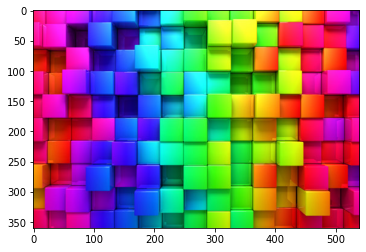

In [3]:
image = get_img("imgg.jpg")
plt.imshow(image)

### Resize the image

In [4]:
image = cv2.resize(image, (700, 500))

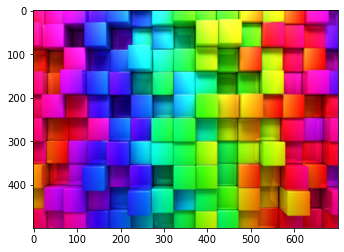

In [5]:
plt.imshow(image)

In [6]:
print(image)

[[[255  25 111]
  [254  26 112]
  [254  26 115]
  ...
  [ 73   1 126]
  [ 73   1 128]
  [ 73   1 129]]

 [[255  25 111]
  [254  26 112]
  [254  26 115]
  ...
  [ 75   1 130]
  [ 75   1 132]
  [ 74   1 133]]

 [[255  25 110]
  [254  25 111]
  [254  26 114]
  ...
  [ 78   1 135]
  [ 77   1 137]
  [ 76   2 137]]

 ...

 [[216   1  54]
  [216   1  55]
  [216   0  56]
  ...
  [204   1  50]
  [204   1  52]
  [204   1  53]]

 [[214   1  52]
  [215   1  54]
  [215   0  56]
  ...
  [205   1  51]
  [205   1  53]
  [205   1  54]]

 [[214   0  52]
  [215   1  54]
  [215   0  56]
  ...
  [206   2  52]
  [206   2  54]
  [206   2  55]]]


In [7]:
image.shape

(500, 700, 3)

In [8]:
type(image)

numpy.ndarray

In [9]:
x = image.reshape(image.shape[0]*image.shape[1],3)

In [10]:
x

array([[255,  25, 111],
       [254,  26, 112],
       [254,  26, 115],
       ...,
       [206,   2,  52],
       [206,   2,  54],
       [206,   2,  55]], dtype=uint8)

### K -Means Model

### Finding the top 5 color in the model

In [11]:
km = KMeans(n_clusters=8)

In [13]:
km.fit(x)

KMeans()

In [14]:
prominent_colors = km.cluster_centers_
prominent_colors = prominent_colors.astype(int)
print(prominent_colors)

[[198 212  20]
 [216  13 193]
 [ 30  37 115]
 [ 39 202  49]
 [140  35  20]
 [229  32  46]
 [ 25 218 202]
 [ 53  49 235]]


Text(0.5, 1.0, 'Prominent Colors')

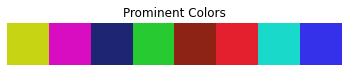

In [15]:
plt.imshow([prominent_colors])
plt.axis('off')
plt.title("Prominent Colors")

In [17]:
intensity_list = Counter(km.labels_)
print(intensity_list)

Counter({5: 54518, 3: 54340, 7: 48520, 0: 47139, 1: 43190, 4: 37724, 6: 32646, 2: 31923})


In [18]:
keys = list(intensity_list.keys())
values = list(intensity_list.values())
print(keys)
print(values)

[5, 1, 7, 2, 6, 3, 0, 4]
[54518, 43190, 48520, 31923, 32646, 54340, 47139, 37724]


### Visualization Of Prominency level

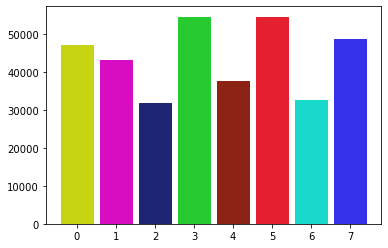

In [19]:
bar_graph = plt.bar(keys,values)
for x in range(0, len(prominent_colors)):
  s=bar_graph[x].set_color(prominent_colors[keys[x]].astype(float)/255.0)
plt.show(bar_graph)

### Finding images using Colors

In [29]:
Dir_name = 'colors'
COLORS = {
    'GREEN': [0, 128, 0],
    'BLUE': [0, 0, 128],
    'YELLOW': [255, 255, 0],
    'RED':[128,0,0],
    'BLACK': [0,0,0],
    'WHITE': [255,255,255]
}

images = []

for file in os.listdir(Dir_name):
    if file.startswith('i'):
        images.append(get_img(os.path.join(Dir_name, file)))

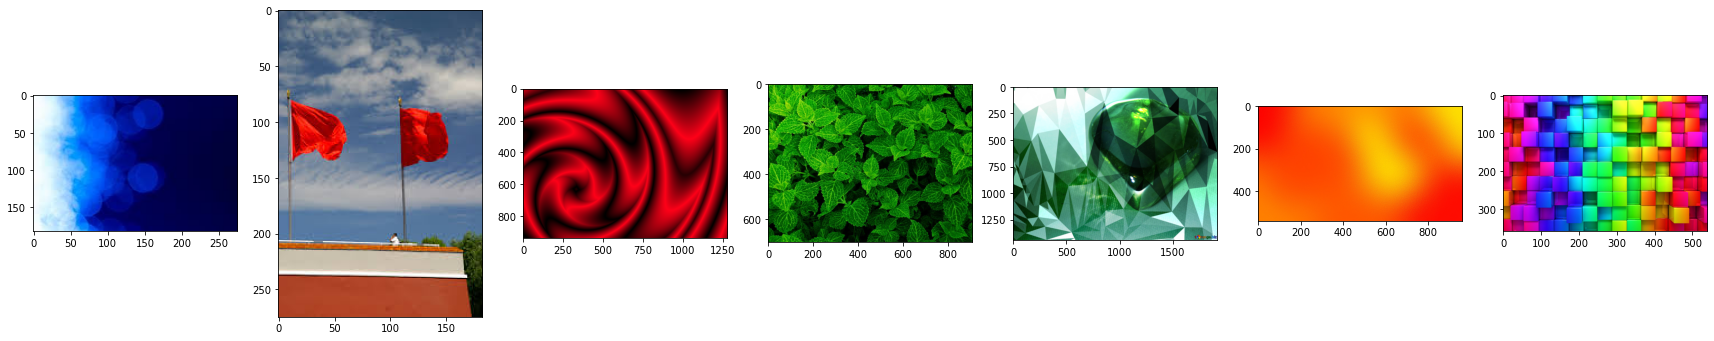

In [30]:
plt.figure(figsize=(30, 25))
for i in range(len(images)):
    plt.subplot(1, len(images), i+1)
    plt.imshow(images[i])

In [31]:
def get_colors(image,number_of_colors,show_chart):
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    counts = Counter(labels)
    center_colors = clf.cluster_centers_
    ordered_colors = [center_colors[i] for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]
    return rgb_colors

In [32]:
from skimage.color import rgb2lab, deltaE_cie76
def match_image_by_color(image, color, threshold = 60, number_of_colors = 10): 
    
    image_colors = get_colors(image, number_of_colors, False)
    selected_color = rgb2lab(np.uint8(np.asarray([[color]])))

    select_image = False
    for i in range(number_of_colors):
        curr_color = rgb2lab(np.uint8(np.asarray([[image_colors[i]]])))
        diff = deltaE_cie76(selected_color,curr_color)
        if (diff < threshold):
            select_image = True
    
    return select_image

In [33]:
def show_selected_images(images, color, threshold, colors_to_match):
    index = 1
    
    for i in range(len(images)):
        selected = match_image_by_color(images[i],
                                        color,
                                        threshold,
                                        colors_to_match)
        if (selected):
            plt.subplot(1, 5, index)
            plt.imshow(images[i])
            index += 1

## Color Detections

### Search RED

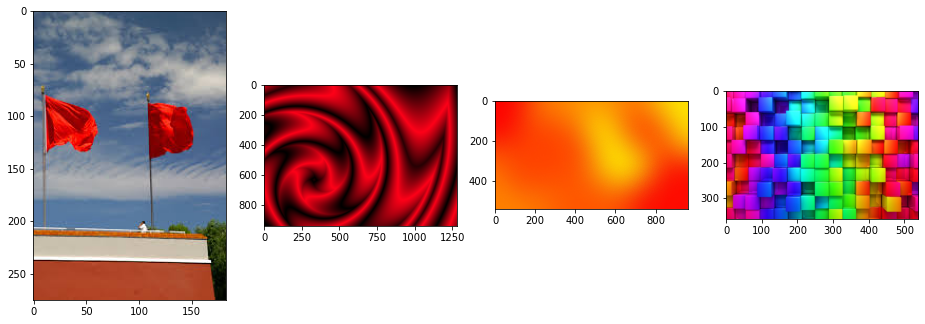

In [34]:
selected_color=COLORS['RED']
threshold=60
plt.figure(figsize = (20, 10))
show_selected_images(images,selected_color, threshold, 5)

### Search Green

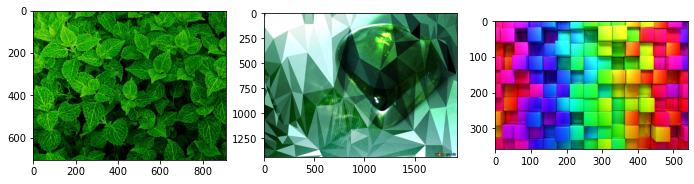

In [35]:
selected_color=COLORS['GREEN']
threshold=60
plt.figure(figsize = (20, 10))
show_selected_images(images,selected_color, threshold, 5)

### Search Blue

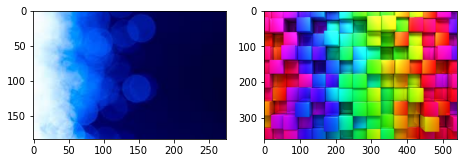

In [36]:
selected_color=COLORS['BLUE']
threshold=60
plt.figure(figsize = (20, 10))
show_selected_images(images,selected_color, threshold, 5)

# Thank You , The Sparks Foundations